In [1]:
#!pip install -U scikit-learn scipy matplotlib

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import os
import itertools
import glob
from utils import *


In [2]:
iou_treshold = 0.5
CONFIDENCE_THRESHOLD = 0.2
IMAGE_WIDTH = 2464
IMAGE_HEIGHT = 2056

SYNTETIC_DATA_DIRECTORY = '/cluster/home/solveijm/DNV_synthetic_data_w_pose'
CREATE_TESTSET = False

# Syntethic data folders to be tested on

We have trained on: 
- '2023-04-26_1656_dnv_scenario1_full_00_000_MorningClear' 
- '2023-04-26_1658_dnv_scenario1_full_00_000_MorningCloudy'
- Hurtigruta dataset

In [3]:
light_condition1 = ['2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear']
light_condition2 = ['2023-05-09_1300_dnv_scenario1_full_00_000_AfternoonCloudy', '2023-05-09_1308_dnv_scenario1_full_00_000_EveningClear']
light_condition3 = ['2023-05-09_1324_dnv_scenario1_full_00_000_NightClear']

cloud_light1 = ['2023-05-09_1330_dnv_scenario1_full_00_000_NoonCloudy']
cloud_light2 = ['2023-05-09_1302_dnv_scenario1_full_00_000_AfternoonCloudy_Rain', '2023-05-09_1313_dnv_scenario1_full_00_000_EveningCloudy_Rain']
cloud_light3 = ['2023-05-09_1326_dnv_scenario1_full_00_000_NightCloudy']

rain_light1 = ['2023-05-09_1332_dnv_scenario1_full_00_000_NoonCloudy_Rain']
rain_light2 = ['2023-05-09_1311_dnv_scenario1_full_00_000_EveningCloudy', '2023-05-09_1300_dnv_scenario1_full_00_000_AfternoonCloudy']

foggy = ['2023-05-09_1315_dnv_scenario1_full_00_000_FoggyClear', '2023-05-09_1317_dnv_scenario1_full_00_000_FoggyCloudy']

stormy = ['2023-05-09_1339_dnv_scenario1_full_00_000_StormClouds']
stormy_rain = ['2023-05-09_1332_dnv_scenario1_full_00_000_NoonCloudy_Rain']


all_conditions = [light_condition1, light_condition2, light_condition3, cloud_light1, cloud_light2, cloud_light3, rain_light1, rain_light2, foggy, stormy, stormy_rain]
all_conditions_names = ['light_condition1', 'light_condition2', 'light_condition3', 'cloud_light1', 'cloud_light2', 'cloud_light3', 'rain_light1', 'rain_light2', 'foggy', 'stormy', 'stormy_rain']


## Create test set for each folder

In [4]:
if CREATE_TESTSET:
    test_sets = {}

    for i, condition in enumerate(all_conditions):
        all_image_paths = []
        for folder in condition:
            path = os.path.join(SYNTETIC_DATA_DIRECTORY, folder)+'/images/'
            image_paths = glob.glob(f'{path}*.jpg')
            for image in image_paths:
                all_image_paths.append(os.path.join(path, image))
        test_file = os.path.join(SYNTETIC_DATA_DIRECTORY, f'test_{all_conditions_names[i]}.txt')
        test_sets[all_conditions_names[i]] = test_file
        with open(test_file, 'w+') as f:
            f.writelines('\n'.join(all_image_paths))
    print(test_sets)


# Run tests
To run these remove #! and run in terminal, or just remove # and run in ipynb

## Different light conditions

### Light condition 1

In [5]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_100e_1024imgsz_only_hurtigruta_correct/weights/best.pt source='/cluster/home/solveijm/DNV_synthetic_data_w_pose/2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear/test.txt' imgsz=1024 name=test_light_condition1_1024imgz_only_hurtigruta_correct save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[264  64]
 [560   0]]
Precision:
0.8048780487804879
Recall:
0.32038834951456313


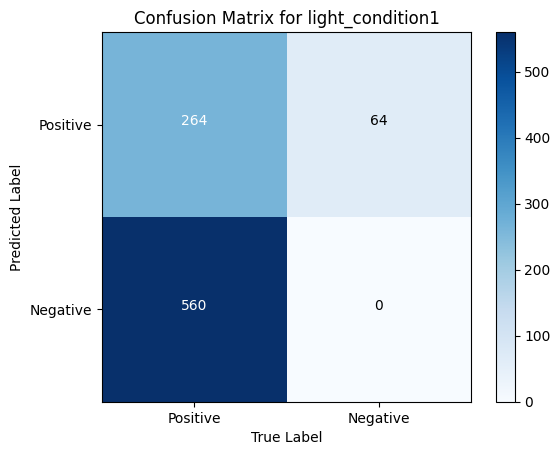

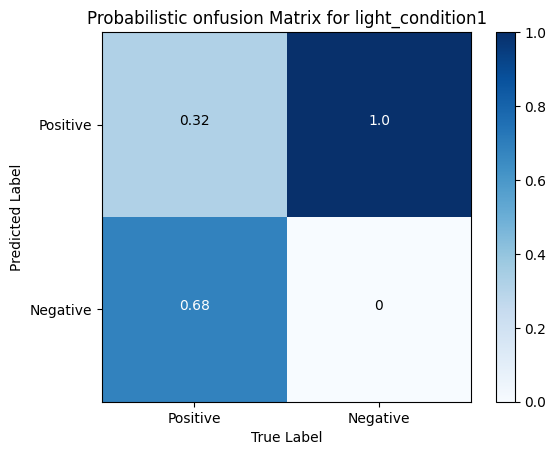



BOUNDING BOX ERRORS FOR light_condition1
IoU threshold:  0.5
Error of center x
169
Expected value: 1.2839726431226723
Standard deviation: 11.912442013404451

Error of center y
129
Expected value: 6.5821906412639475
Standard deviation: 8.834341680595957

Error of width
258
Expected value: 16.39851737546467
Standard deviation: 58.90995797331168

Error of height
82
Expected value: 15.408863579925644
Standard deviation: 28.856175437930773


 DROPOUT STATS


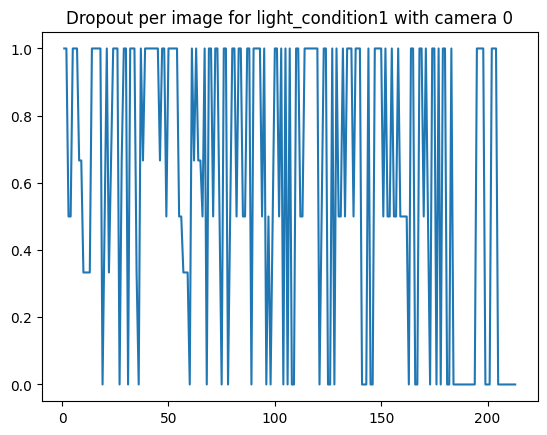

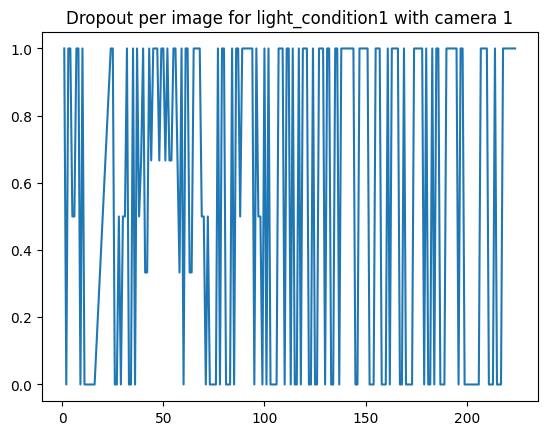

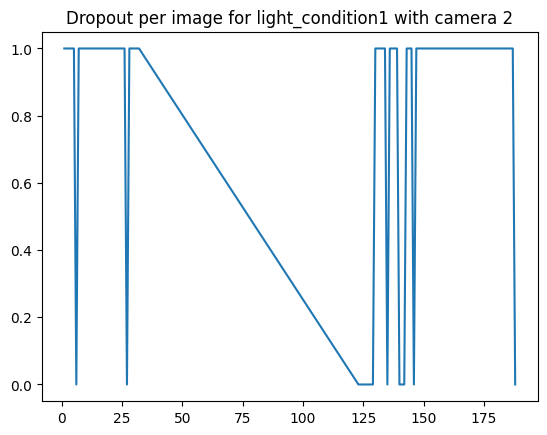

In [6]:
condition_name = 'light_condition1'
condition_folders = light_condition1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]

PREDICTED_PATH = '../../runs/detect/test_light_condition1_1024imgz_only_hurtigruta_correct/labels'

ground_truth_annots, predicted_detections = display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name='light_condition1')

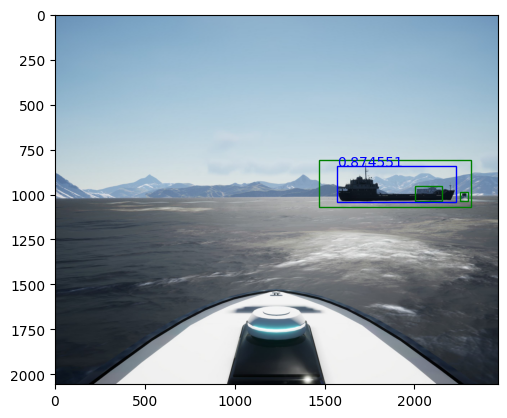

In [10]:
image_dir = GROUND_TRUTH_PATHS[0]+'/images/'

#['CAM00_img209', 'CAM00_img046', 'CAM00_img049', 'CAM00_img047']
ct = 0.59
for image in ['CAM00_img046']:
    display_predicted(image, image_dir, ground_truth_annots, predicted_detections, ct)

### Light condition 2

In [9]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition2.txt' imgsz=640 name=test_light_condition2 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[353 775]
 [468   0]]
Precision:
0.3129432624113475
Recall:
0.4299634591961023


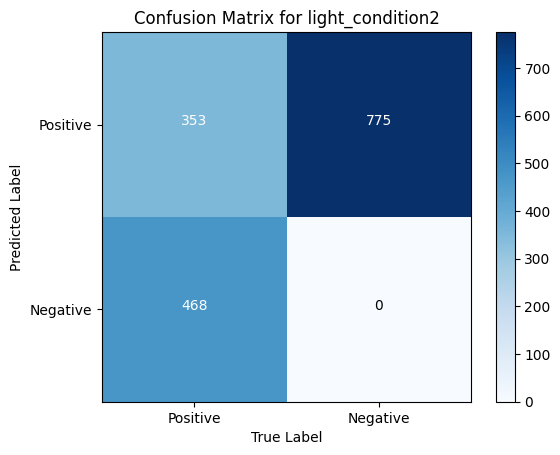

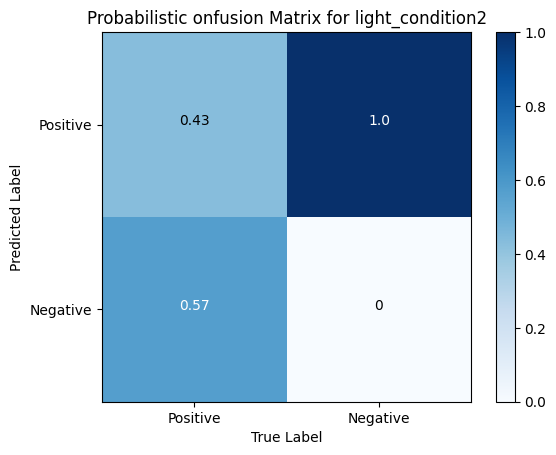



BOUNDING BOX ERRORS FOR light_condition2
IoU threshold:  0.5
Error of center x
Expected value: -3.1731862360406033
Variance: 2537.831009363388

Error of center y
Expected value: -2.9059636637055855
Variance: 1273.801891345641

Error of width
Expected value: -2.9198529796954333
Variance: 8919.789290347459

Error of height
Expected value: -14.389789241116766
Variance: 2781.0581666051858


 DROPOUT STATS


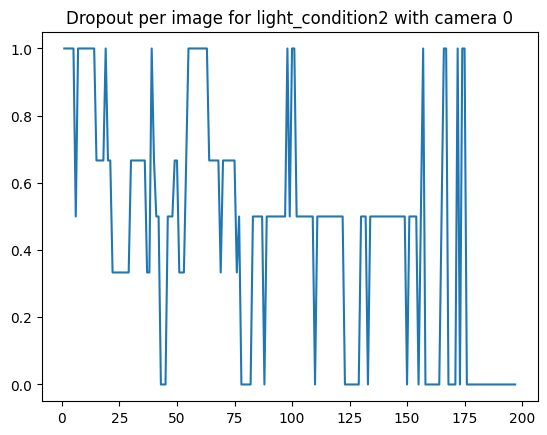

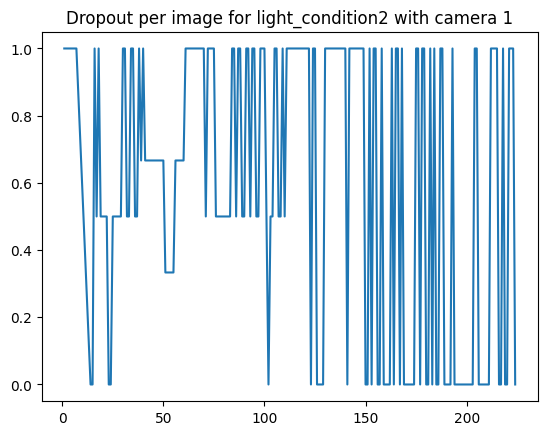

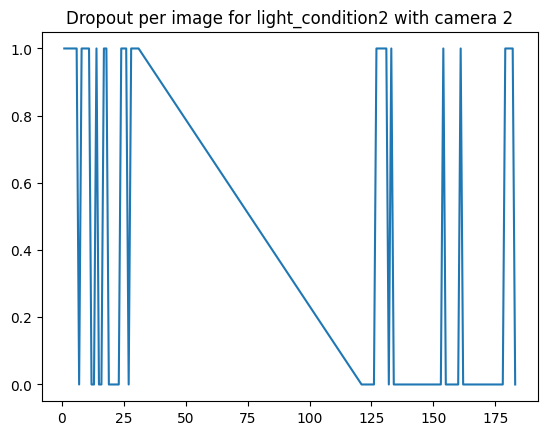

({'CAM00_img045': [{'class_id': 0,
    'x1': 1895.344971,
    'y1': 896.670227,
    'x2': 2464,
    'y2': 1202.140015}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 617.857849,
    'y1': 1167.950073,
    'x2': 657.448608,
    'y2': 1225.036743}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2213.48291,
    'y1': 822.294006,
    'x2': 2464,
    'y2': 1086.388306}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 736.761353,
    'y1': 1135.200806,
    'x2': 780.66626,
    'y2': 1193.434937}],
  'CAM01_img015': [{'class_id': 0,
    'x1': 0,
    'y1': 973.184326,
    'x2': 68.986923,
    'y2': 1063.26123}],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 312.818512,
    'y1': 1072.761108,
    'x2': 351.899445,
    'y2': 1126.856934}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 338.958221,
    'y1': 1029.872803,
    'x2': 517.524048,
    'y2': 1113.740356},
   {'class_id': 0,
    'x1': 31.859461,
    'y1': 869.960693,
    'x2': 880.710999,
    'y2': 1165.530762},
   {'cla

In [10]:
condition_name = 'light_condition2'
condition_folders = light_condition2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Light condition 3

In [11]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition3.txt' imgsz=640 name=test_light_condition3 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[202 121]
 [609   0]]
Precision:
0.6253869969040248
Recall:
0.24907521578298397


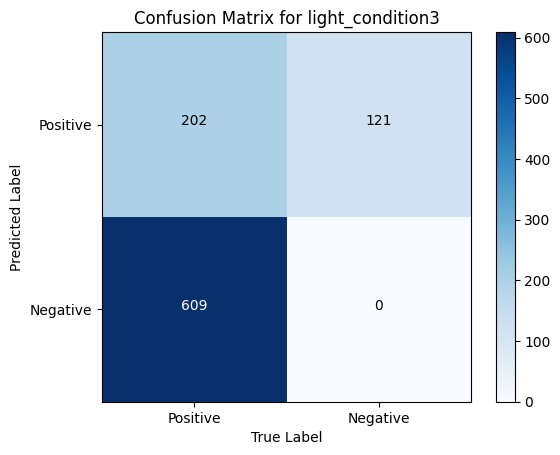

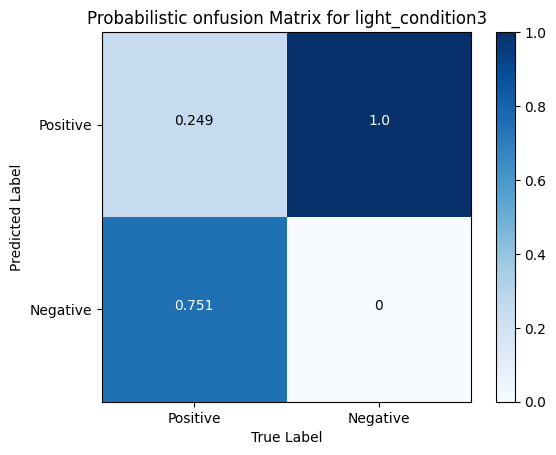



BOUNDING BOX ERRORS FOR light_condition3
IoU threshold:  0.5
Error of center x
Expected value: -6.186001742718453
Variance: 666.1047125817129

Error of center y
Expected value: 4.589489393203876
Variance: 132.95445684400494

Error of width
Expected value: -13.449375291262143
Variance: 5793.632274068399

Error of height
Expected value: 0.03372164077669441
Variance: 641.1480308582411


 DROPOUT STATS


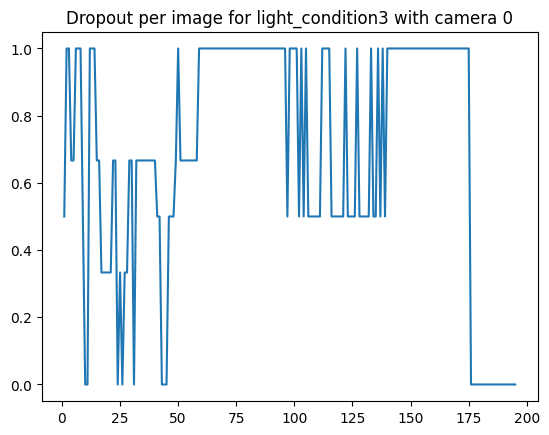

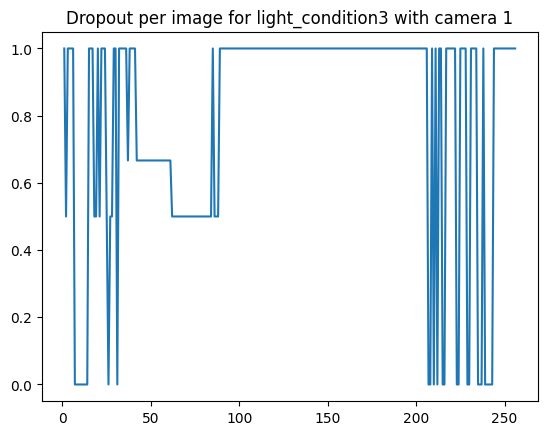

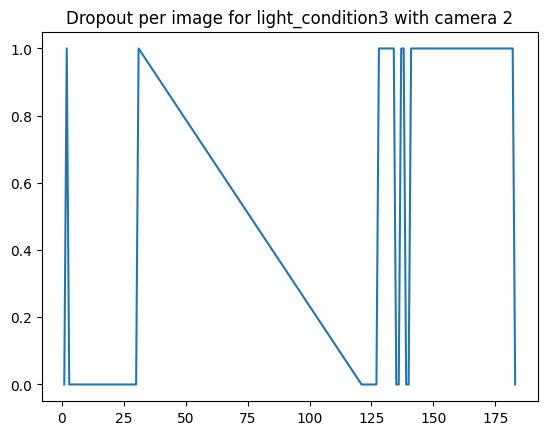

({'CAM00_img045': [{'class_id': 0,
    'x1': 2070.539062,
    'y1': 772.40033,
    'x2': 2464,
    'y2': 1111.677612}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 579.334656,
    'y1': 1118.612061,
    'x2': 617.711853,
    'y2': 1171.456909}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2178.547363,
    'y1': 818.037048,
    'x2': 2464,
    'y2': 1176.056519}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 757.996948,
    'y1': 995.130493,
    'x2': 798.784241,
    'y2': 1049.683594}],
  'CAM01_img015': [{'class_id': 0,
    'x1': 0,
    'y1': 949.842957,
    'x2': 55.126167,
    'y2': 1031.567017}],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 316.227203,
    'y1': 1129.895752,
    'x2': 352.860321,
    'y2': 1180.428101}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 344.871765,
    'y1': 974.027222,
    'x2': 519.782654,
    'y2': 1054.392944},
   {'class_id': 0,
    'x1': 293.081573,
    'y1': 783.830688,
    'x2': 1133.155884,
    'y2': 1100.306763},
   {'c

In [12]:
condition_name = 'light_condition3'
condition_folders = light_condition3
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Cloud in various light conditions

### Cloud and light1

In [13]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light1.txt' imgsz=640 name=test_cloud_light1 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[475 169]
 [252   0]]
Precision:
0.7375776397515528
Recall:
0.6533700137551581


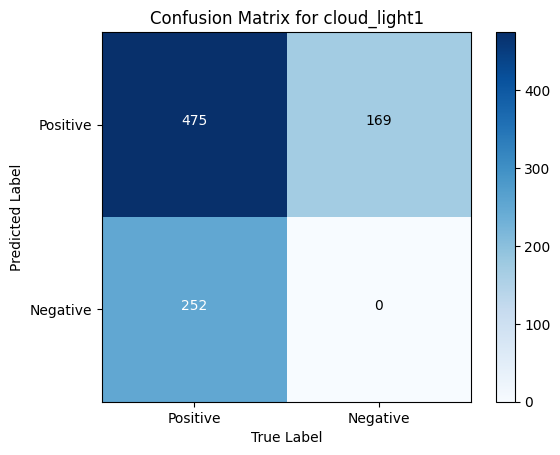

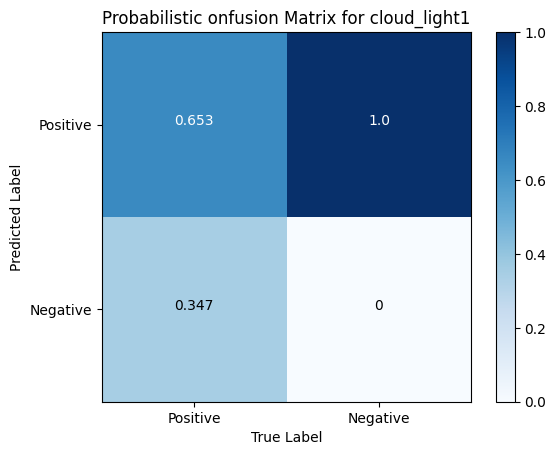



BOUNDING BOX ERRORS FOR cloud_light1
IoU threshold:  0.5
Error of center x
Expected value: 0.572930518404907
Variance: 28.167972268340176

Error of center y
Expected value: 0.9869268640081846
Variance: 241.4060605534963

Error of width
Expected value: 4.390919670756645
Variance: 133.95375296865703

Error of height
Expected value: 8.950612685071572
Variance: 880.8955456969773


 DROPOUT STATS


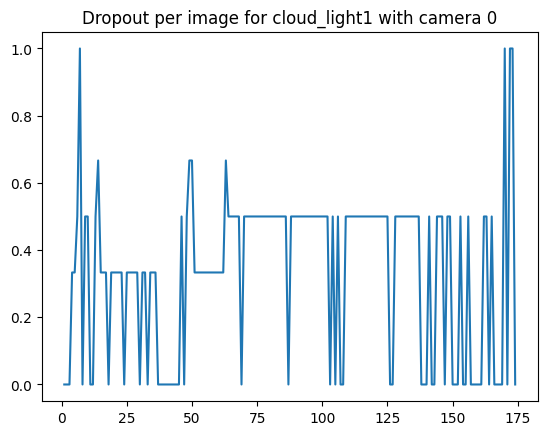

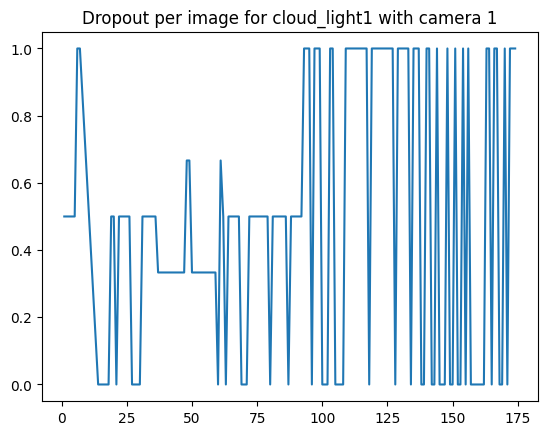

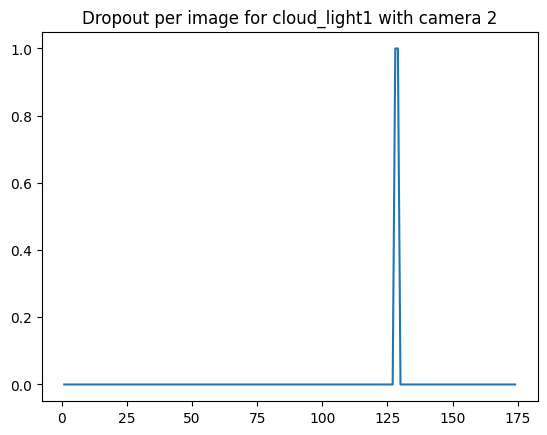

({'CAM00_img045': [{'class_id': 0,
    'x1': 1986.921631,
    'y1': 789.369263,
    'x2': 2464,
    'y2': 1092.251587}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 608.302612,
    'y1': 944.521484,
    'x2': 647.647705,
    'y2': 1002.021667}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2227.308105,
    'y1': 889.501282,
    'x2': 2464,
    'y2': 1169.194214}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 740.339417,
    'y1': 1077.58728,
    'x2': 784.005005,
    'y2': 1135.649658}],
  'CAM01_img015': [{'class_id': 0,
    'x1': 0,
    'y1': 1088.384155,
    'x2': 67.923767,
    'y2': 1176.60144}],
  'CAM01_img118': [{'class_id': 0,
    'x1': 314.389984,
    'y1': 891.380371,
    'x2': 353.418121,
    'y2': 946.349487}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 355.616699,
    'y1': 1000.869995,
    'x2': 531.778748,
    'y2': 1081.869019},
   {'class_id': 0,
    'x1': 202.180878,
    'y1': 829.12085,
    'x2': 1023.28894,
    'y2': 1121.754517},
   {'class_id': 0,
    'x1': 70

In [14]:
condition_name = 'cloud_light1'
condition_folders = cloud_light1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD ,IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Cloud and light2

In [15]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light2.txt' imgsz=640 name=test_cloud_light2 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[ 92 395]
 [688   0]]
Precision:
0.188911704312115
Recall:
0.11794871794871795


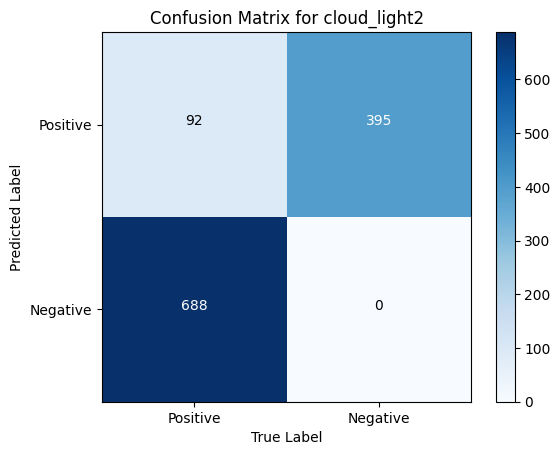

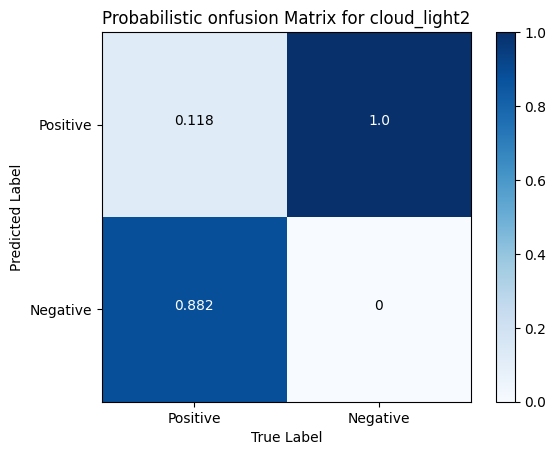



BOUNDING BOX ERRORS FOR cloud_light2
IoU threshold:  0.5
Error of center x
Expected value: -12.035257010638308
Variance: 4127.767429136544

Error of center y
Expected value: 6.606065462765955
Variance: 2958.601224497832

Error of width
Expected value: -23.382187957446796
Variance: 15711.04381598632

Error of height
Expected value: 12.344904414893632
Variance: 3119.163921980158


 DROPOUT STATS


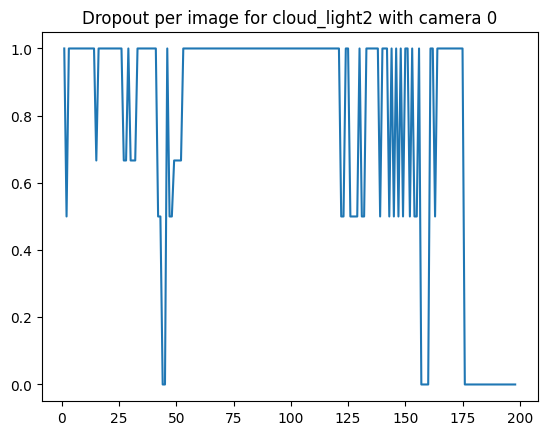

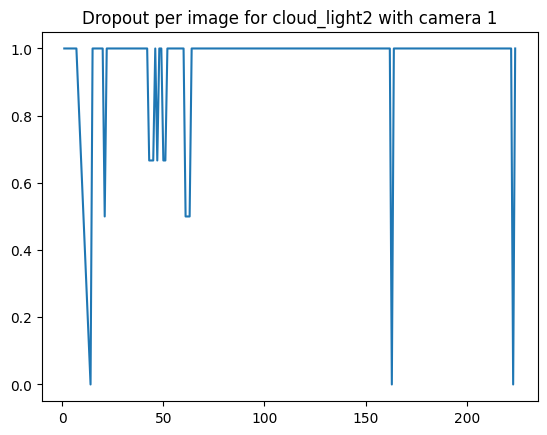

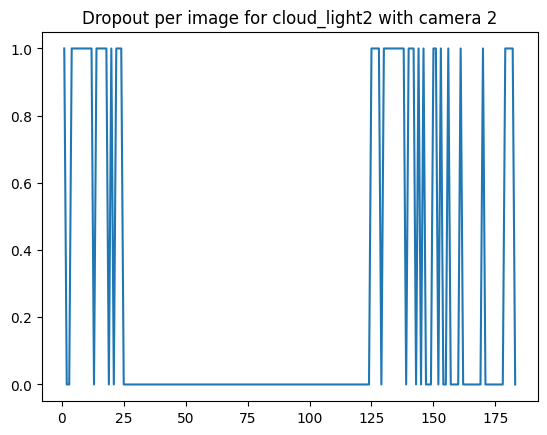

({'CAM00_img045': [{'class_id': 0,
    'x1': 2098.762207,
    'y1': 850.830139,
    'x2': 2464,
    'y2': 1227.776245}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 618.64386,
    'y1': 1153.775269,
    'x2': 656.035645,
    'y2': 1206.750977}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2160.914551,
    'y1': 778.459656,
    'x2': 2464,
    'y2': 1104.280396}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 732.883667,
    'y1': 1150.386353,
    'x2': 775.649902,
    'y2': 1205.026489}],
  'CAM01_img015': [{'class_id': 0,
    'x1': 0,
    'y1': 1020.737915,
    'x2': 50.541016,
    'y2': 1103.193726}],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 309.921661,
    'y1': 1038.332886,
    'x2': 347.064697,
    'y2': 1088.924561}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 318.264587,
    'y1': 1036.994751,
    'x2': 506.911865,
    'y2': 1121.932617},
   {'class_id': 0,
    'x1': 322.647003,
    'y1': 842.358704,
    'x2': 1163.7146,
    'y2': 1170.748535},
   {'

In [16]:
condition_name = 'cloud_light2'
condition_folders = cloud_light2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Cloud and light 3

In [17]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light3.txt' imgsz=640 name=test_cloud_light3 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[188  63]
 [539   0]]
Precision:
0.749003984063745
Recall:
0.2585969738651995


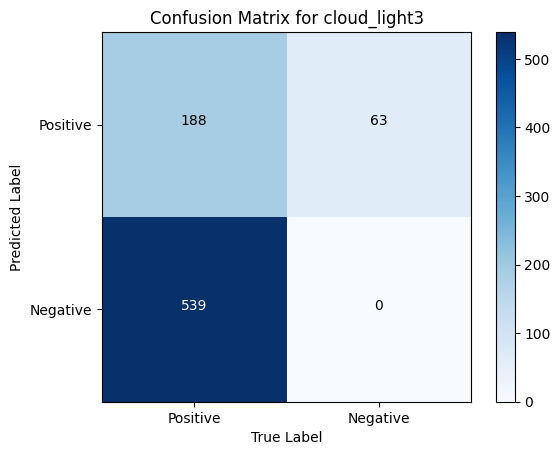

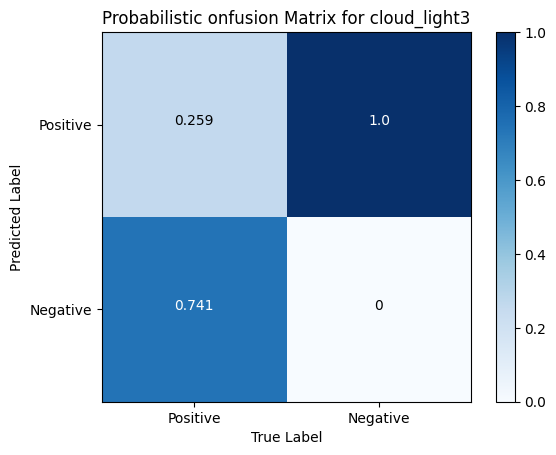



BOUNDING BOX ERRORS FOR cloud_light3
IoU threshold:  0.5
Error of center x
Expected value: -5.7627631941489375
Variance: 1043.331350087163

Error of center y
Expected value: 5.49788405319149
Variance: 272.07888251241314

Error of width
Expected value: -51.36035356914897
Variance: 7011.47044323641

Error of height
Expected value: -1.3878560212765945
Variance: 701.1188897654754


 DROPOUT STATS


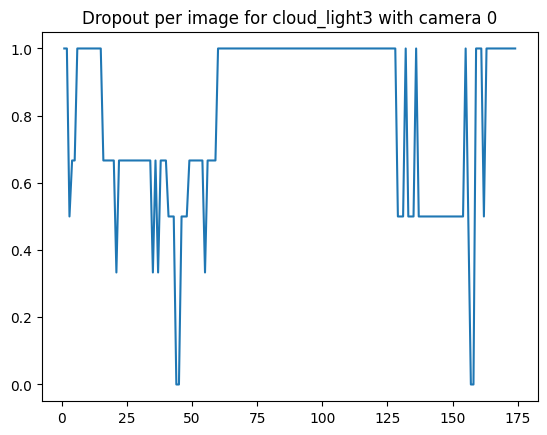

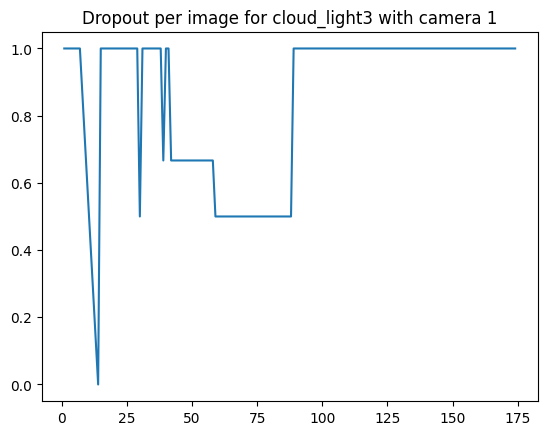

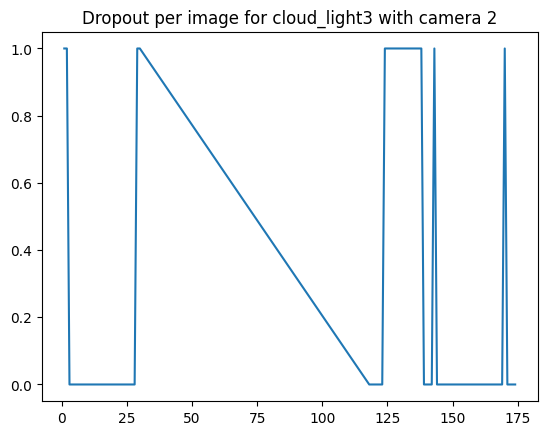

({'CAM00_img045': [{'class_id': 0,
    'x1': 2012.980713,
    'y1': 865.577209,
    'x2': 2464,
    'y2': 1191.664673}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 603.59491,
    'y1': 1197.522827,
    'x2': 643.411499,
    'y2': 1254.318237}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2228.91626,
    'y1': 796.710266,
    'x2': 2464,
    'y2': 1104.407959}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 742.38623,
    'y1': 1072.432251,
    'x2': 785.975708,
    'y2': 1131.100586}],
  'CAM01_img015': [{'class_id': 0,
    'x1': 0,
    'y1': 938.844421,
    'x2': 65.496956,
    'y2': 1029.012329}],
  'CAM01_img118': [{'class_id': 0,
    'x1': 314.260681,
    'y1': 1149.38855,
    'x2': 353.241943,
    'y2': 1203.578491}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 297.332092,
    'y1': 1013.732727,
    'x2': 490.405548,
    'y2': 1096.286377},
   {'class_id': 0,
    'x1': 199.655746,
    'y1': 839.551697,
    'x2': 1023.850464,
    'y2': 1141.458618},
   {'class_id': 0,
    'x1': 

In [18]:
condition_name = 'cloud_light3'
condition_folders = cloud_light3
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Rain

### Rain light 1

In [19]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_rain_light1.txt' imgsz=640 name=test_rain_light1 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[643  65]
 [112   0]]
Precision:
0.9081920903954802
Recall:
0.8516556291390729


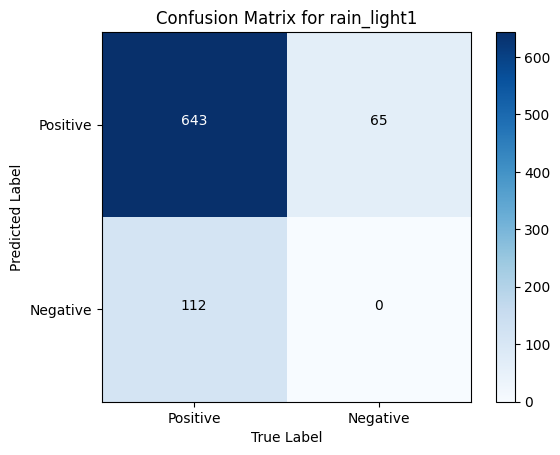

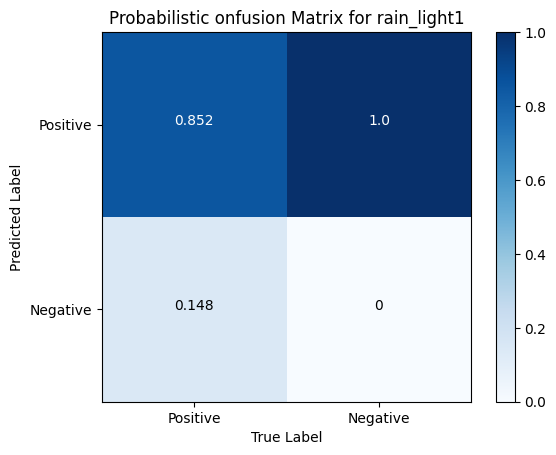



BOUNDING BOX ERRORS FOR rain_light1
IoU threshold:  0.5
Error of center x
Expected value: 0.5246513867362133
Variance: 137.4594688014587

Error of center y
Expected value: -0.9592686318926946
Variance: 104.50897321743713

Error of width
Expected value: 6.288970940387487
Variance: 792.6218237210333

Error of height
Expected value: 7.946623597615492
Variance: 549.0389426480228


 DROPOUT STATS


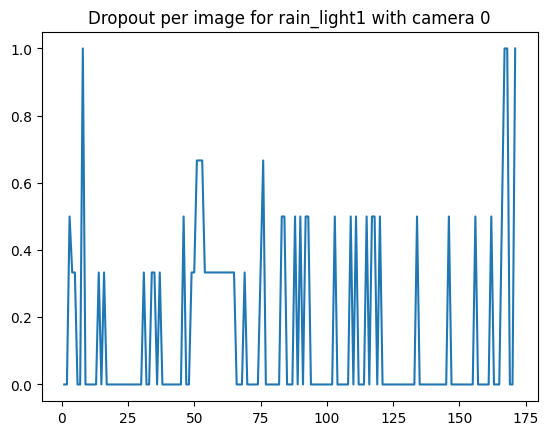

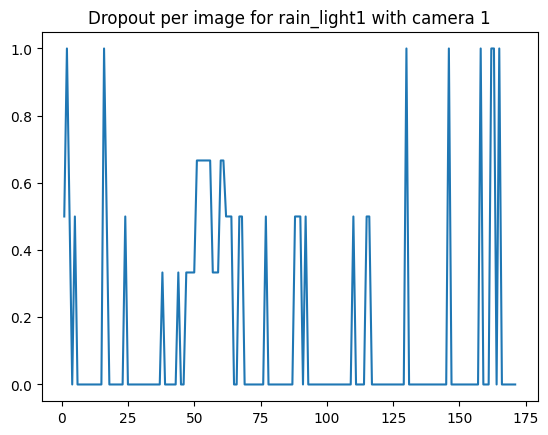

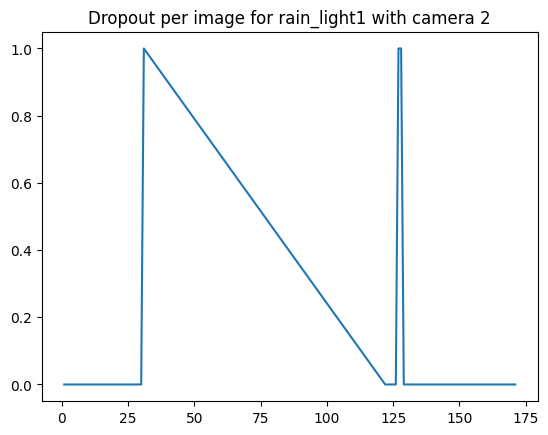

({'CAM00_img045': [{'class_id': 0,
    'x1': 1897.925537,
    'y1': 898.622681,
    'x2': 2464,
    'y2': 1201.58313}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 620.639954,
    'y1': 1167.795288,
    'x2': 656.65686,
    'y2': 1214.964233}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2219.241943,
    'y1': 833.070007,
    'x2': 2464,
    'y2': 1088.392944}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 736.059448,
    'y1': 1154.265015,
    'x2': 777.441833,
    'y2': 1203.013184}],
  'CAM01_img015': [{'class_id': 0,
    'x1': 0,
    'y1': 1024.236206,
    'x2': 59.58252,
    'y2': 1097.491455}],
  'CAM01_img118': [{'class_id': 0,
    'x1': 312.524261,
    'y1': 1055.925903,
    'x2': 348.202332,
    'y2': 1101.020996}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 345.81192,
    'y1': 1035.331055,
    'x2': 523.179749,
    'y2': 1119.630005},
   {'class_id': 0,
    'x1': 17.484819,
    'y1': 877.071289,
    'x2': 871.593872,
    'y2': 1173.180664},
   {'class_id': 0,
    'x1': 6

In [20]:
condition_name = 'rain_light1'
condition_folders = rain_light1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Rain light 2

In [21]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_rain_light2.txt' imgsz=640 name=test_rain_light2 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[334 377]
 [445   0]]
Precision:
0.469760900140647
Recall:
0.4287548138639281


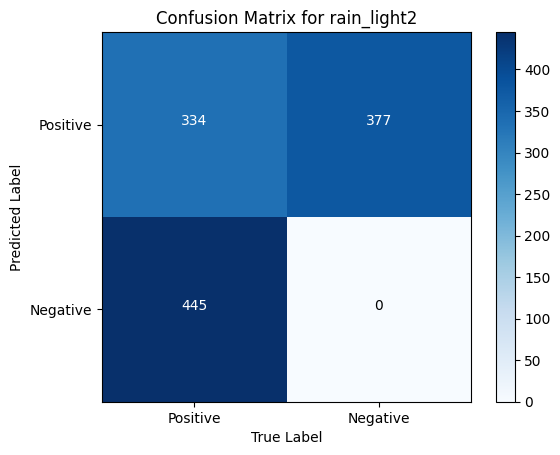

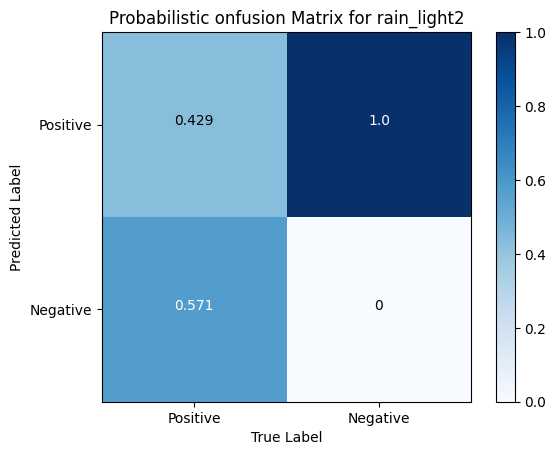



BOUNDING BOX ERRORS FOR rain_light2
IoU threshold:  0.5
Error of center x
Expected value: 9.121558927777773
Variance: 2800.3379497056812

Error of center y
Expected value: 2.485750093055563
Variance: 345.0371147433316

Error of width
Expected value: 22.179391127777784
Variance: 11189.220152918973

Error of height
Expected value: 10.910032591666665
Variance: 1021.5986070494472


 DROPOUT STATS


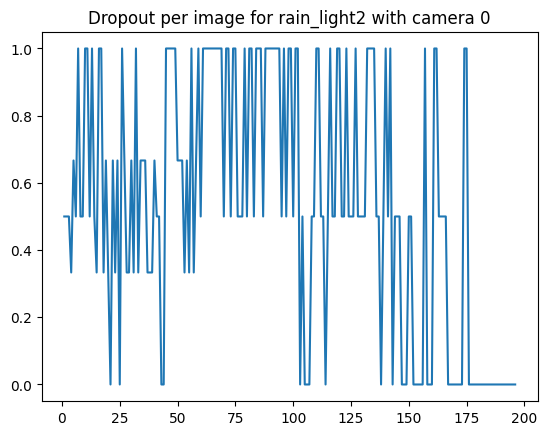

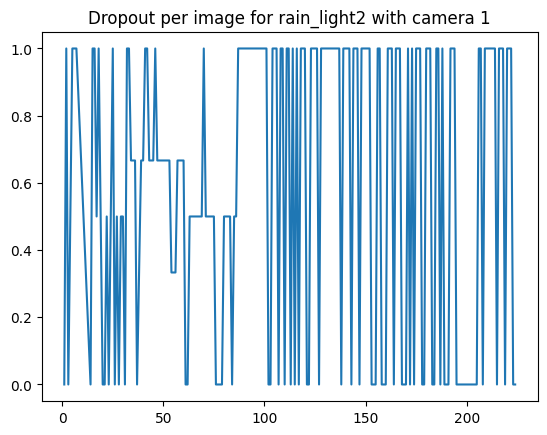

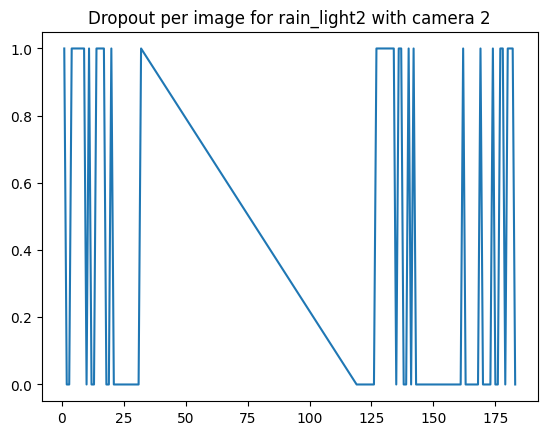

({'CAM00_img045': [{'class_id': 0,
    'x1': 2097.762451,
    'y1': 743.719543,
    'x2': 2464,
    'y2': 1116.518555}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 605.902405,
    'y1': 944.672241,
    'x2': 642.368713,
    'y2': 997.580505}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2085.568115,
    'y1': 833.734619,
    'x2': 2464,
    'y2': 1176.243896}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 739.175659,
    'y1': 1076.844727,
    'x2': 780.553223,
    'y2': 1131.216675}],
  'CAM01_img015': [{'class_id': 0,
    'x1': 0,
    'y1': 1104.34668,
    'x2': 58.598957,
    'y2': 1186.418701}],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 312.449463,
    'y1': 896.91748,
    'x2': 349.170746,
    'y2': 947.859497}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 345.206787,
    'y1': 1005.771118,
    'x2': 525.595276,
    'y2': 1087.042603},
   {'class_id': 0,
    'x1': 361.266418,
    'y1': 801.219604,
    'x2': 1219.902466,
    'y2': 1137.875366},
   {'cla

In [22]:
condition_name = 'rain_light2'
condition_folders = rain_light2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Fog

In [23]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_foggy.txt' imgsz=640 name=test_foggy save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[  6   3]
 [804   0]]
Precision:
0.6666666666666666
Recall:
0.007407407407407408


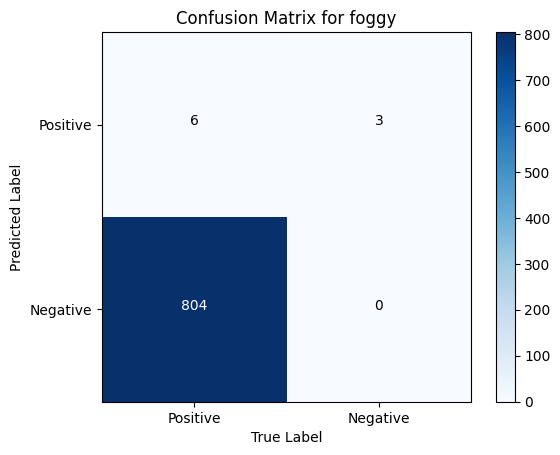

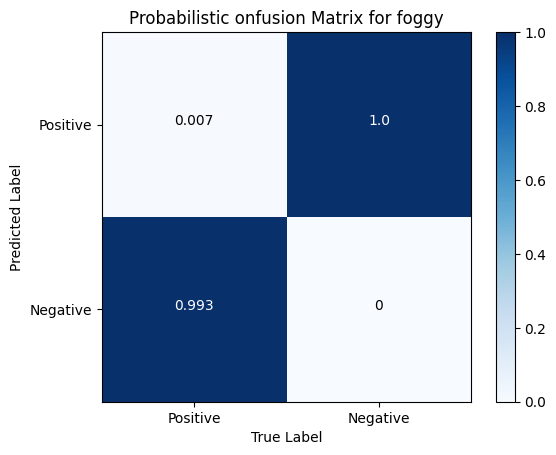



BOUNDING BOX ERRORS FOR foggy
IoU threshold:  0.5
Error of center x
Expected value: -0.5112205714286152
Variance: 2093.095346032303

Error of center y
Expected value: 6.973379928571425
Variance: 1076.4609518526297

Error of width
Expected value: -63.63595342857146
Variance: 17778.29072354588

Error of height
Expected value: -83.31290128571428
Variance: 841.5691377033339


 DROPOUT STATS


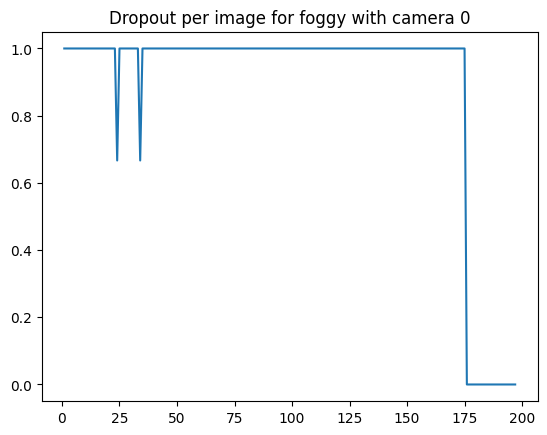

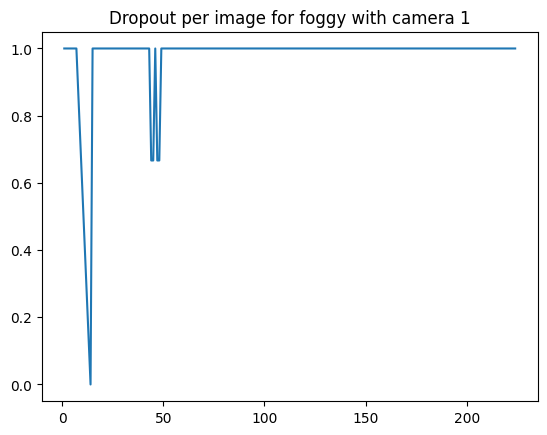

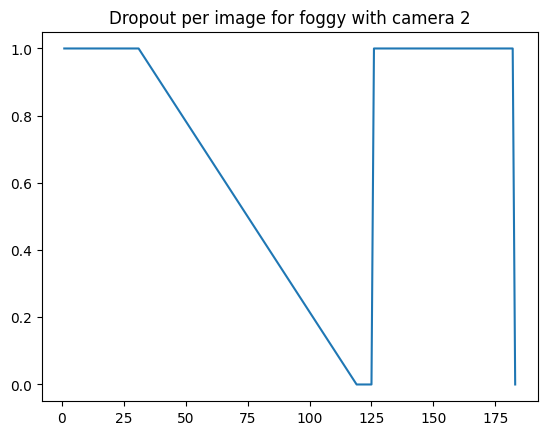

({'CAM00_img045': [{'class_id': 0,
    'x1': 1902.731934,
    'y1': 878.523743,
    'x2': 2464,
    'y2': 1180.554321}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 603.046448,
    'y1': 1197.588501,
    'x2': 642.852966,
    'y2': 1254.390137}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2217.441406,
    'y1': 816.632141,
    'x2': 2464,
    'y2': 1096.592163}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 742.377258,
    'y1': 1072.706299,
    'x2': 785.944214,
    'y2': 1131.385376}],
  'CAM01_img015': [{'class_id': 0,
    'x1': 0,
    'y1': 937.883179,
    'x2': 64.962654,
    'y2': 1028.109985}],
  'CAM00_img187': [],
  'CAM01_img118': [{'class_id': 0,
    'x1': 313.887634,
    'y1': 1149.840454,
    'x2': 352.857758,
    'y2': 1204.030884}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 315.708405,
    'y1': 1012.941956,
    'x2': 501.539307,
    'y2': 1095.232178},
   {'class_id': 0,
    'x1': 62.15884,
    'y1': 850.44635,
    'x2': 899.684143,
    'y2': 1141.744507},
   {'cl

In [24]:
condition_name = 'foggy'
condition_folders = foggy
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Stormy

In [25]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_stormy.txt' imgsz=640 name=test_stormy save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[  2   1]
 [721   0]]
Precision:
0.6666666666666666
Recall:
0.0027662517289073307


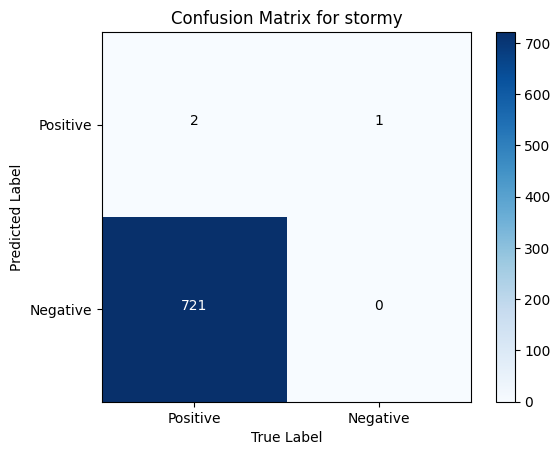

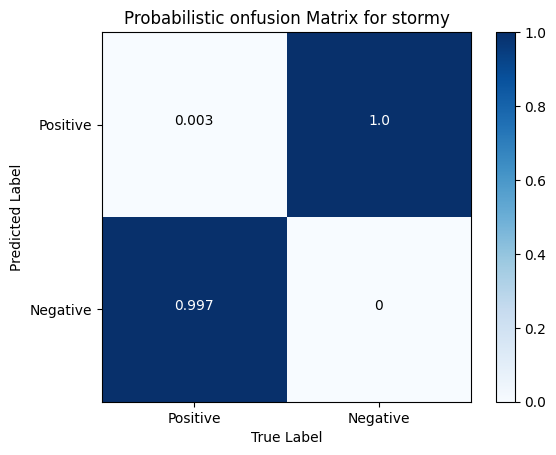



BOUNDING BOX ERRORS FOR stormy
IoU threshold:  0.5
Error of center x
Expected value: -10.561263999999824
Variance: 475.53955739003294

Error of center y
Expected value: -8.412689
Variance: 0.8567316576040672

Error of width
Expected value: -140.03506499999997
Variance: 17303.785525173305

Error of height
Expected value: -12.397887999999966
Variance: 339.167619582013


 DROPOUT STATS


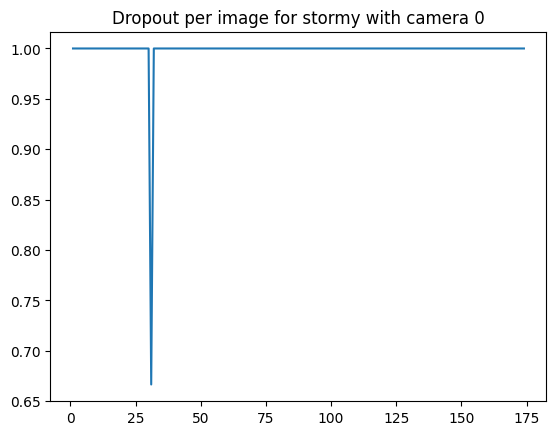

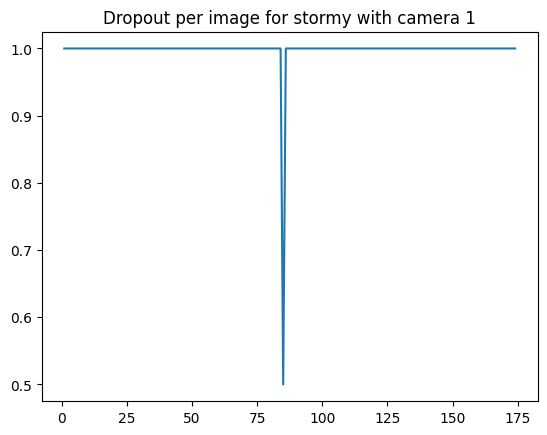

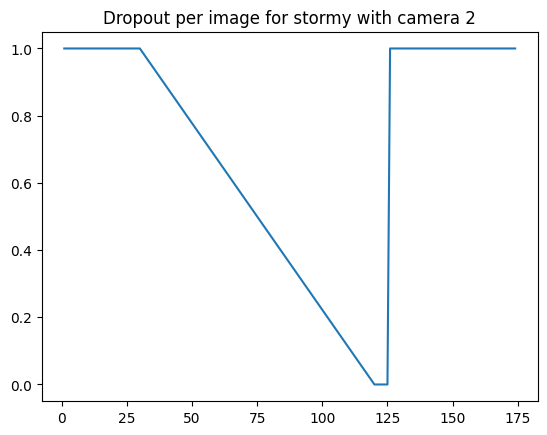

({'CAM00_img045': [{'class_id': 0,
    'x1': 2058.255127,
    'y1': 848.586792,
    'x2': 2464,
    'y2': 1188.428345}],
  'CAM01_img152': [{'class_id': 0,
    'x1': 606.331726,
    'y1': 1226.998413,
    'x2': 629.040527,
    'y2': 1254.101685}],
  'CAM02_img029': [{'class_id': 0,
    'x1': 2216.536377,
    'y1': 783.417175,
    'x2': 2464,
    'y2': 1113.18689}],
  'CAM01_img158': [{'class_id': 0,
    'x1': 751.009521,
    'y1': 1091.510376,
    'x2': 775.16394,
    'y2': 1119.611816}],
  'CAM01_img015': [{'class_id': 0,
    'x1': 10.329222,
    'y1': 978.124573,
    'x2': 55.356968,
    'y2': 1020.360046}],
  'CAM01_img118': [{'class_id': 0,
    'x1': 320.815582,
    'y1': 1183.41748,
    'x2': 342.908478,
    'y2': 1208.94458}],
  'CAM01_img049': [{'class_id': 0,
    'x1': 325.793457,
    'y1': 1009.140076,
    'x2': 507.698853,
    'y2': 1091.126587},
   {'class_id': 0,
    'x1': 256.756226,
    'y1': 829.86084,
    'x2': 1083.900635,
    'y2': 1138.232056},
   {'class_id': 0,
   

In [26]:
condition_name = 'stormy'
condition_folders = stormy
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Stormy and rain

In [27]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_1cls_50e_640imgsz_synthetic/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_stormy_rain.txt' imgsz=640 name=test_stormy_rain save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[  0   0]
 [708   0]]
Precision:
0
Recall:
0.0


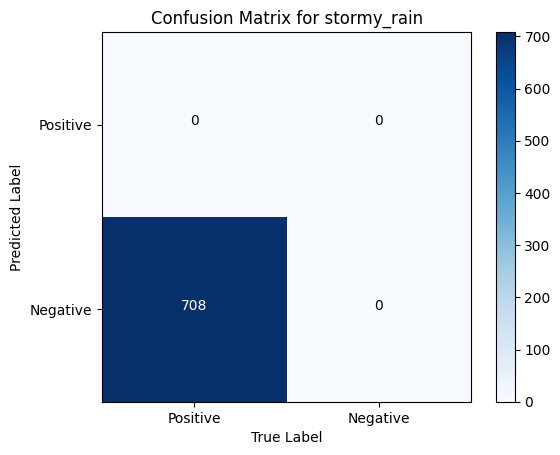

/cluster/work/solveijm/MODSIM/src/detection/utils.py:132: RuntimeWarning: invalid value encountered in scalar divide
  probabilistic_confusion_matrix = [[round(tp/total_annotations,3), fp/fp],[round(fn/total_annotations,3), 0]]


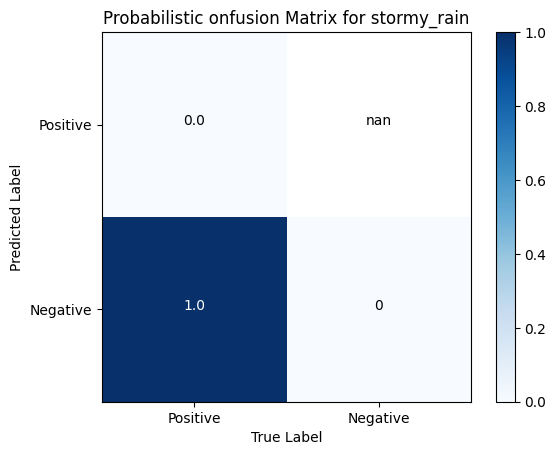



BOUNDING BOX ERRORS FOR stormy_rain
IoU threshold:  0.5
Error of center x


ZeroDivisionError: division by zero

In [28]:
condition_name = 'stormy_rain'
condition_folders = stormy_rain
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_only_train_on_light1_synthetic/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, CONFIDENCE_THRESHOLD, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)